<h2>AIRLINE PASSENGER SATISFACTION DATASET</h2>

This dataset's been downloaded from Kaggle (link: https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction)

Data consists of the details of customers in an airline company who have already flown with them. The main purpose of this dataset is to predict whether a future customer would be satisfied with their service and which aspect of the services offered by them have to be emphasized more to generate more satisfied customers. Data consists of total 129880 observations (train data:103904, test data:25976) and 25 columns. 

**ATTRIBUTES:**

>**Id:** Id number of the passengers

>**Gender:** Gender of the passengers (Female, Male)

>**Customer Type:** The customer type (Loyal customer, disloyal customer)

>**Age:** The actual age of the passengers

>**Type of Travel:** Purpose of the flight of the passengers (Personal Travel, Business Travel)

>**Class:** Travel class in the plane of the passengers (Business, Eco, Eco Plus)

>**Flight Distance:** The flight distance of this journey

>**Inflight wifi service:** Satisfaction level of the inflight wifi service (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)

>**Departure/Arrival time convenient:** Satisfaction level of Departure/Arrival time convenient (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)

>**Ease of Online booking:** Satisfaction level of online booking (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)

>**Gate location:** Satisfaction level of Gate location (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)

>**Food and drink:** Satisfaction level of Food and drink service (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)

>**Online boarding:** Satisfaction level of online boarding (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied) 

>**Seat comfort:** Satisfaction level of Seat comfort (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)

>**Inflight entertainment:** Satisfaction level of inflight entertainment (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)

>**On-board service:** Satisfaction level of On-board service (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)

>**Leg room service:** Satisfaction level of Leg room service (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)

>**Baggage handling:** Satisfaction level of baggage handling (1,2,3,4,5/ 1=Least Satisfied to 5=Most Satisfied)

>**Checkin service:** Satisfaction level of Check-in service (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)

>**Inflight service:** Satisfaction level of inflight service (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)

>**Cleanliness:** Satisfaction level of Cleanliness (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)

>**Departure Delay in Minutes:** Minutes delayed when departure

>**Arrival Delay in Minutes:** Minutes delayed when arrival

>**Satisfaction:** /output column/ Airline satisfaction level ('satisfied', 'neutral or dissatisfied')

Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")
sns.set()

There are two data available, train and test. I will check the first few rows and the column names of this data. For convenience, I will combine two data and continue my operations with a single data.

In [2]:
data_train=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")
data_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
data_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [4]:
data_train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [5]:
data_test.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
print(f"Train data has {data_train.shape[0]} rows and  {data_train.shape[1]} columns.")
print("Distribution of target value:\n")
data_train.satisfaction.value_counts()

Train data has 103904 rows and  25 columns.
Distribution of target value:



neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [7]:
print(f"Test data has {data_test.shape[0]} rows and {data_test.shape[1]} columns.")
print("Distribution of target value:\n")
data_test.satisfaction.value_counts()

Test data has 25976 rows and 25 columns.
Distribution of target value:



neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64

Combining these two dataset into one

In [8]:
data=data_train.append(data_test)
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [9]:
data.shape

(129880, 25)

Looking at the data types, and descriptive statistics of features

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      12988

There are both numeric and object type features in data.

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,129880.0,44158.700000,31207.377062,0.0,16234.75,38963.5,71433.25,103903.0
id,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.00,3.0,4.00,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0


>For the Age column, we can see that the youngest passenger is 7 years old and the oldest passenger is 85 years old. Average age is 39. When we evaluate the quarters, we can observe that the age is evenly distributed.

>For the Flight Distance column, we see that the minimum value is 414 and the maximum value is 4983. The average distance of flight is 1190. When we look at the quarters, we can say that there are outliers because there is too much difference between the 3rd quarter and the maximum value.

>For the Departure Delay in Minutes and Arrival Delay in Minutes columns, the minimum value is 0 (which corresponds to no delay in that flights) and the maximum value is around 1500. When we examine the 3rd quarter and maximum values, we can see that there are too many outlier values. 

>There are many categorical features evaluated in 0-1-2-3-4-5 degrees. If we look at the averages of these ratings, the highest level of satisfaction is the Inflight service category with an average of 3.64, while the lowest is the Inflight wifi service category with an average of 2.72 points.

Checking unique values of target column

In [12]:
data.satisfaction.unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

Checking null values

In [13]:
data.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

'Arrival_Delay_in_Minutes' column has 393 null values. I will deal with them later.

Checking whether data has duplicate values

In [14]:
data.duplicated().sum()

0

Checking number of unique elements in features

In [15]:
data.nunique()

Unnamed: 0                           103904
id                                   129880
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3821
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [16]:
data.loc[data["Customer Type"]=="disloyal Customer","Customer Type"]="Disloyal Customer"
data.loc[data["Type of Travel"]=="Business travel","Type of Travel"]="Business Travel"

<h2> DATA VISUALIZATION </h2>

**Visualizing target column**

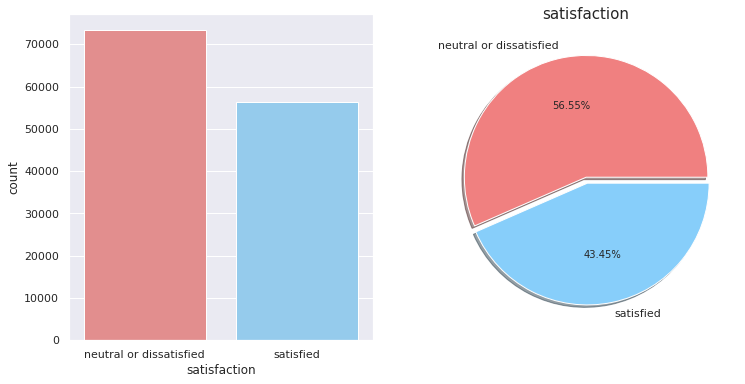

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='satisfaction', data=data, palette=["#f08080","#87cefa"])

plt.subplot(1, 2, 2)
plt.pie(data['satisfaction'].value_counts(), labels=["neutral or dissatisfied","satisfied"], explode=[0, 0.05], autopct='%1.2f%%', shadow=True,colors=["lightcoral","lightskyblue"])
plt.title('satisfaction', fontsize=15)

plt.show()

Our target column consists of two categories which are "neutral or dissatisfied" and "satisfied". Neutral or dissatisfied passenger amount is higher in data. As shown in graph, we can say that we do not have any imbalance problem. 

**Visualizing categorical features**

Let's visualize categorical features by count plot. First comparing their numbers, then comparing their amount with respect to the target column (satisfaction). 

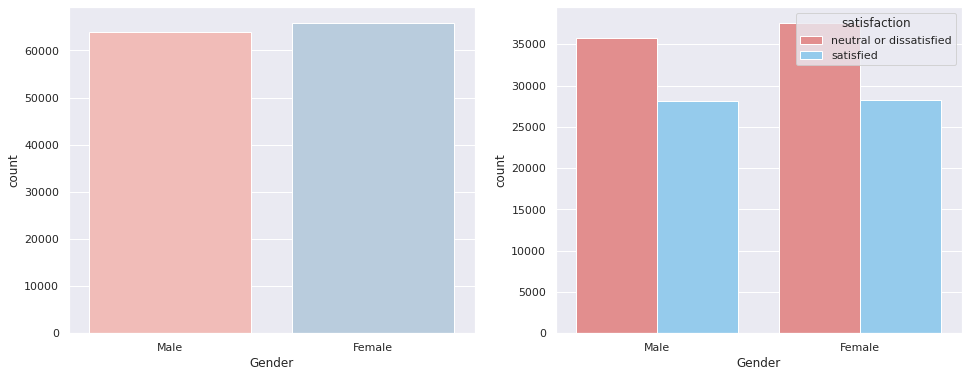

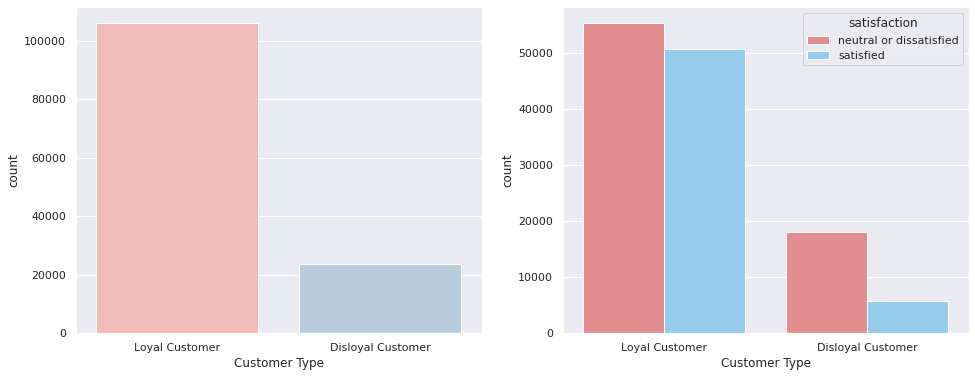

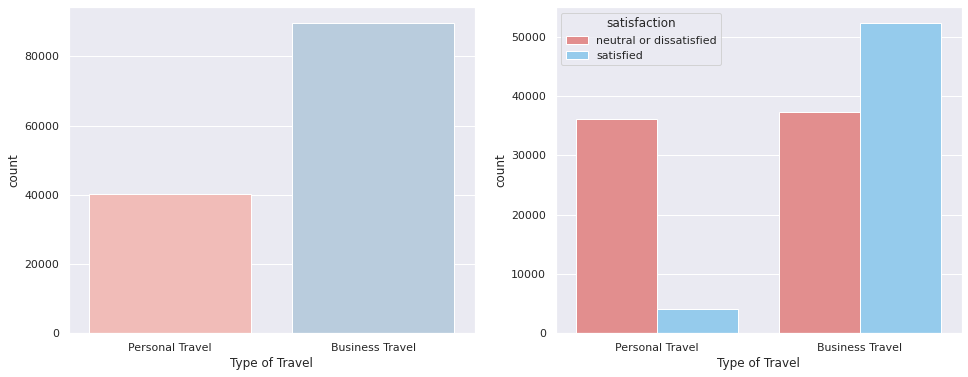

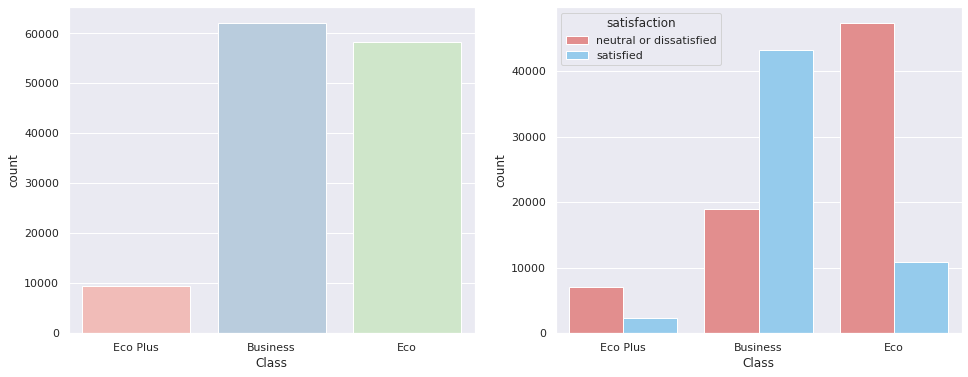

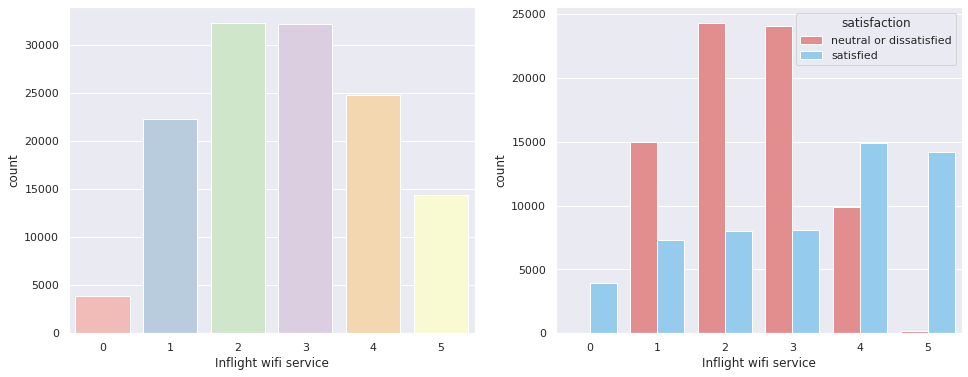

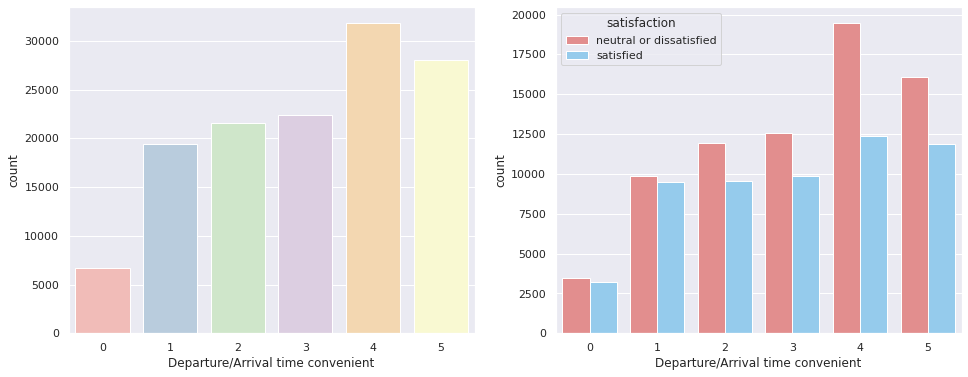

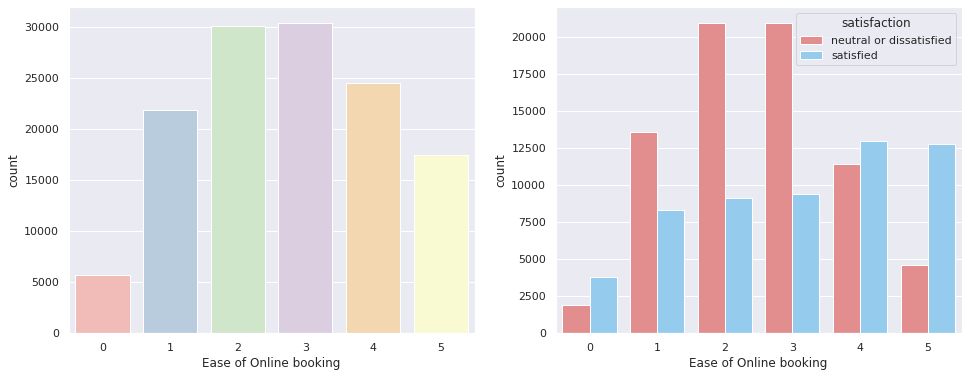

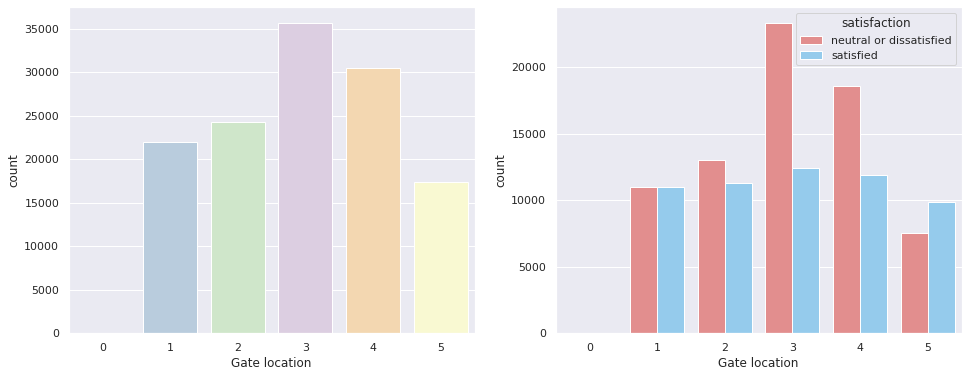

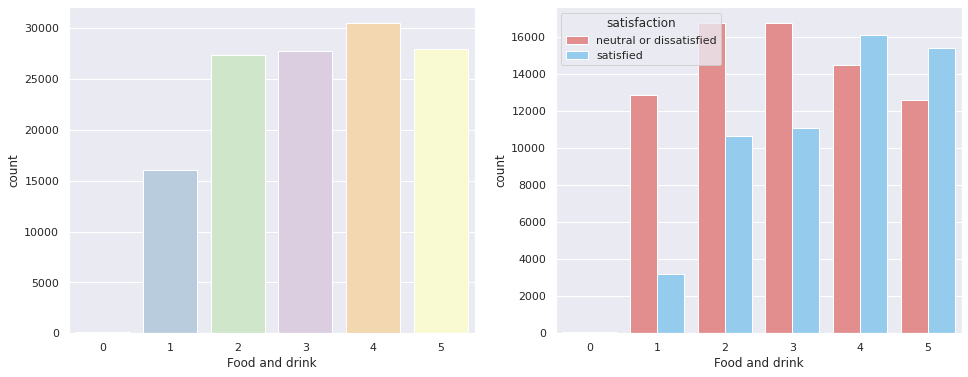

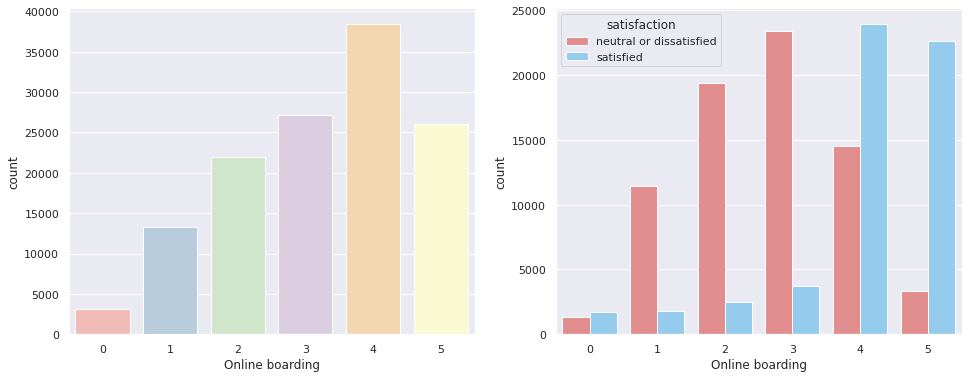

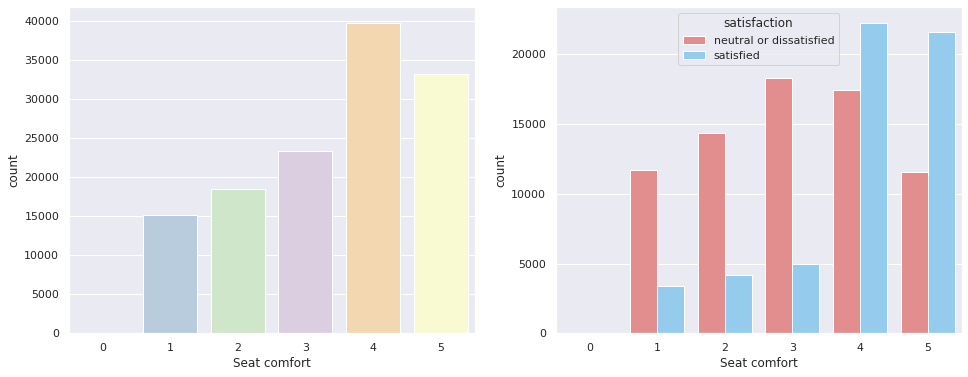

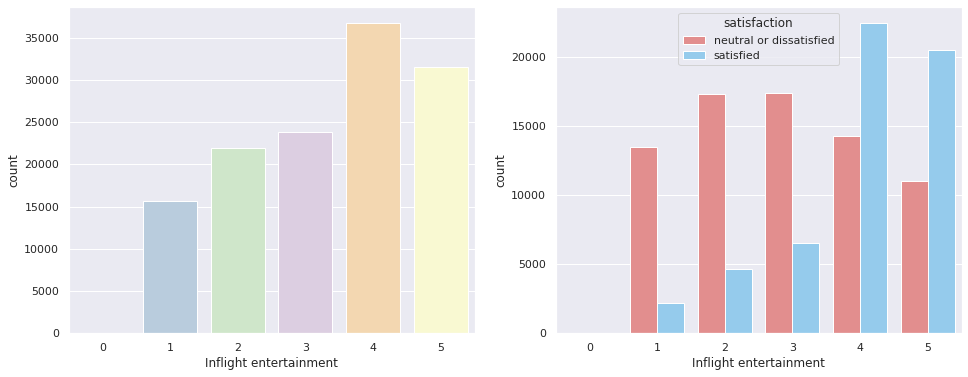

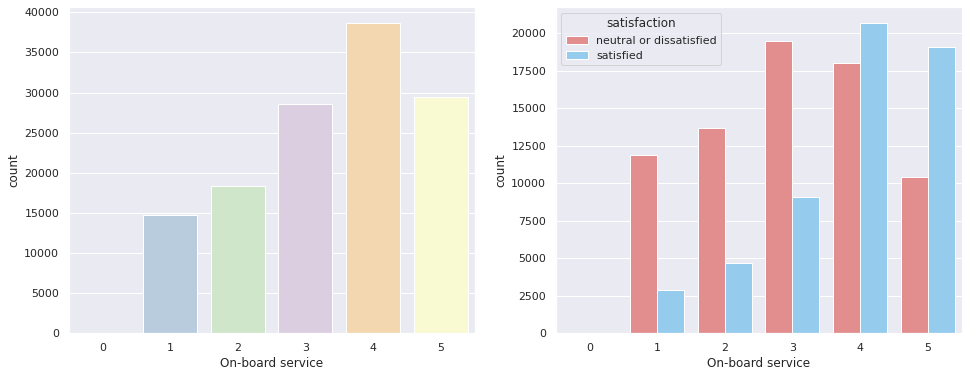

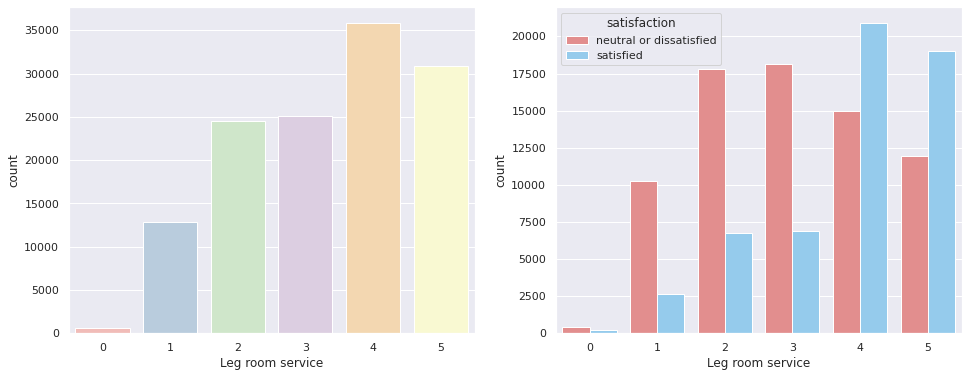

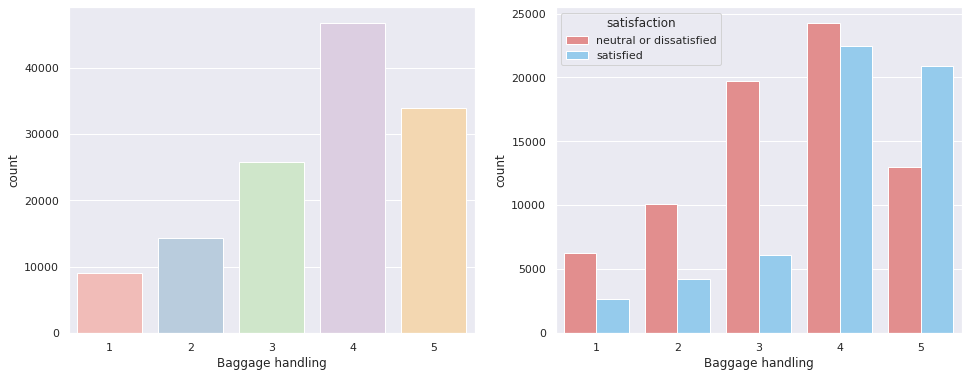

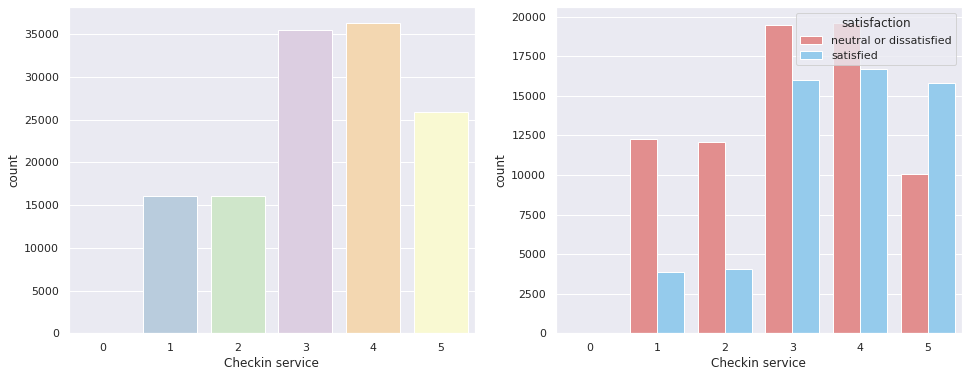

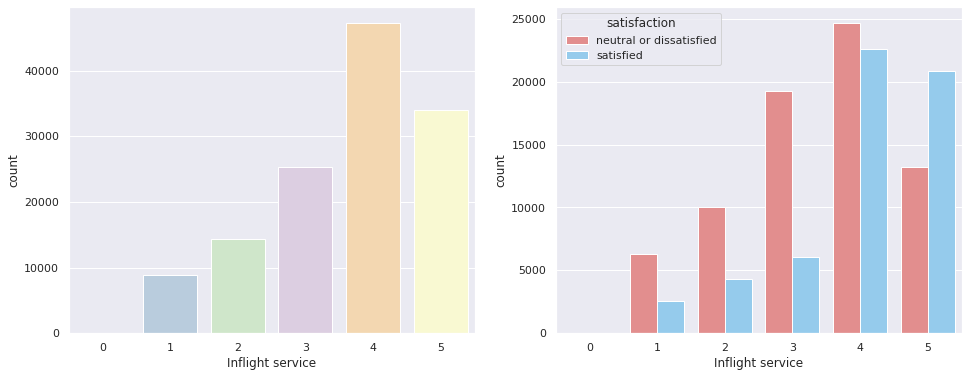

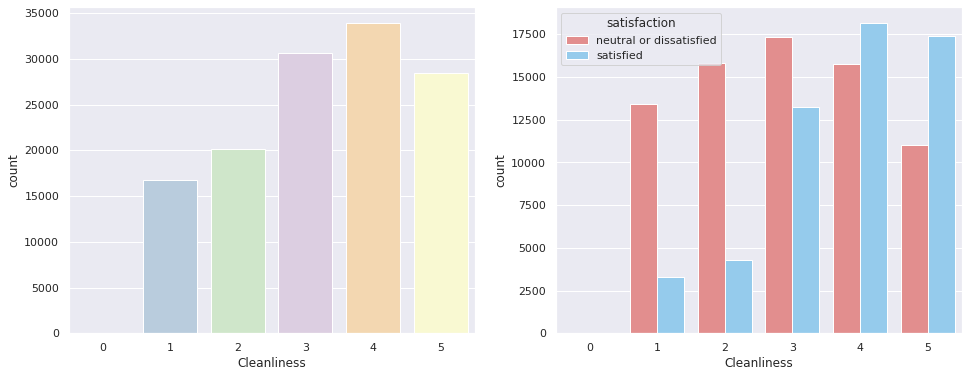

In [18]:
categorics=['Gender', 'Customer Type','Type of Travel', 'Class','Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
for i in categorics:
  plt.figure(figsize=(16,6))
  plt.subplot(1,2,1)
  sns.countplot(x=data[i],palette="Pastel1")

  plt.subplot(1,2,2)
  sns.countplot(x=data[i],hue=data.satisfaction, palette=["#f08080","#87cefa"])
  plt.show()

Female and male data amounts are close to each other. In the Customer Type feature, which is divided into two groups as Loyal customer and disloyal customer, the number of Loyal customers is more than the number of Disloyal customers. We can say that half of the Loyal customers are satisfied and half are neutral or dissatisfied. But in Disloyal customers, the number of satisfied passengers is less than the number of neutral or dissatisfied. Type of Travel feature consists of two categories as Personal and Business travel. It seems that the number of passengers making Business travel is higher than those making Personnel travel. While the number of satisfied passengers is higher in Business travel, the number of satisfied passengers is very low in Personal travel. Class features are divided into three categories: Eco, Business, and Eco Plus. While the number of passengers in the Business and Eco classes is close to each other, the number of passengers in the Eco Plus class is much less. While the majority of passengers in Business class are satisfied, the majority of passengers in Eco class are neutral or dissatisfied. In the other features, there are 6 categories from 1 to 5 (increasing satisfaction rates), while 0 represents unimplemented features. Neutral or dissatisfied passengers appear more in all categories of the Departure/Arrival time convenient feature. As we can predict for other features, neutral or dissatisfied passengers are more at low satisfaction levels like 0-1-2 at the beginning, while satisfied passengers are more at high satisfaction levels like 4-5.

Removing [ 'Gender' , 'Customer_Type' , 'Type_of_Travel' , 'Class' ] features from categorics list so I only have categorical features having 0-1-2-3-4-5 scores can stay in list.

In [19]:
for i in ['Gender','Customer Type','Type of Travel','Class']:
  categorics.remove(i)

In [20]:
data[categorics].mean().sort_values(ascending=False)

Inflight service                     3.642193
Baggage handling                     3.632114
Seat comfort                         3.441361
On-board service                     3.383023
Inflight entertainment               3.358077
Leg room service                     3.350878
Checkin service                      3.306267
Cleanliness                          3.286326
Online boarding                      3.252633
Food and drink                       3.204774
Departure/Arrival time convenient    3.057599
Gate location                        2.976925
Ease of Online booking               2.756876
Inflight wifi service                2.728696
dtype: float64

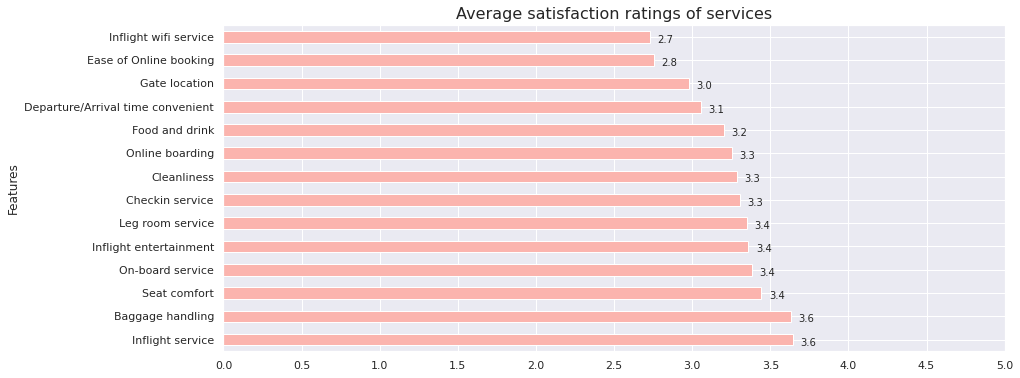

In [21]:
total = float(len(data))
ax = data[categorics].mean().sort_values(ascending=False).plot(kind="barh",ylabel="Features",colormap="Pastel1",xticks=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5],figsize=(14,6))
plt.title('Average satisfaction ratings of services', fontsize=16)
for p in ax.patches:
    count = '{:.1f}'.format(p.get_width())
    x, y = p.get_x() + p.get_width()+0.15, p.get_y()
    ax.annotate(count, (x, y), ha='right')
plt.show()

The features with the highest average satisfaction rate are Inflight_service and Baggage_handling with average 3.6. The feature with the lowest satisfaction rate is Inflight_wifi_service with average 2.7.

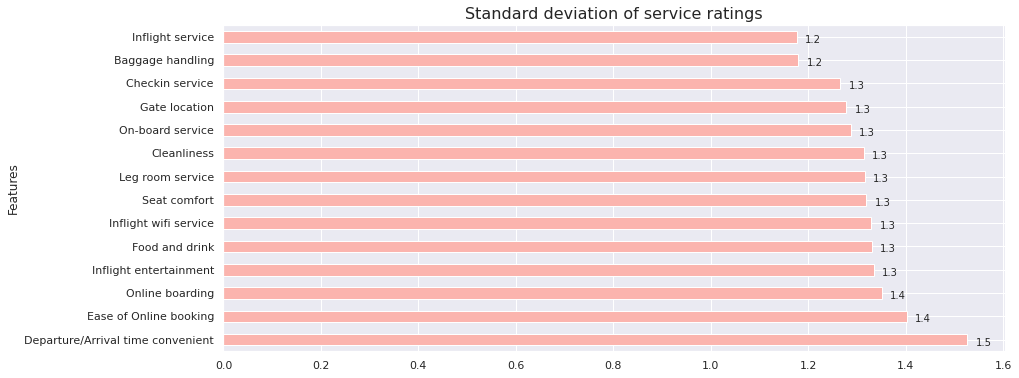

In [22]:
ax = data[categorics].std().sort_values(ascending=False).plot(kind="barh",ylabel="Features",colormap="Pastel1",figsize=(14,6))
plt.title('Standard deviation of service ratings', fontsize=16)
for p in ax.patches:
    count = '{:.1f}'.format(p.get_width())
    x, y = p.get_x() + p.get_width()+0.05, p.get_y()
    ax.annotate(count, (x, y), ha='right')
plt.show()

I also checked the standard deviation to account for any deviations between ratings. They are close to each other.

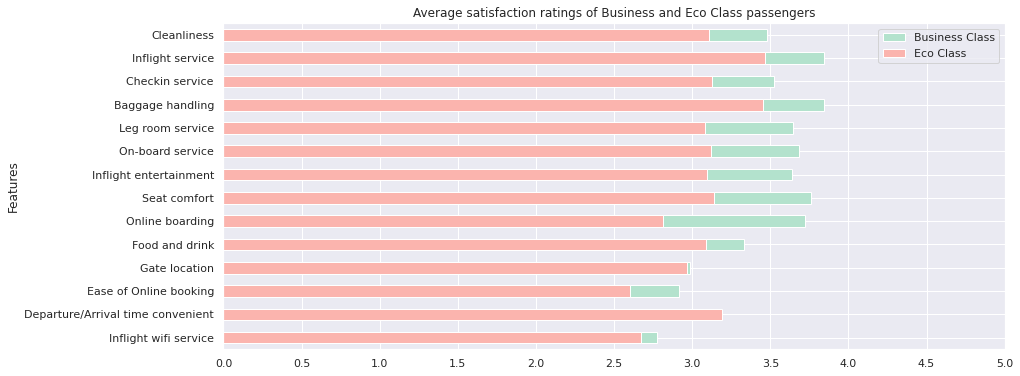

In [23]:
data[data["Class"]=="Business"].mean()[4:18].plot(kind="barh",legend=True,ylabel="Features",colormap="Pastel2",figsize=(14,6),label="Business Class",title="Average satisfaction ratings of Business and Eco Class passengers")
data[data["Class"]=="Eco"].mean()[4:18].plot(kind="barh",legend=True,colormap="Pastel1",label="Eco Class",xticks=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.show()

We can see that Business Class passengers give higher ratings to services than Eco Class passengers.

<Figure size 504x504 with 0 Axes>

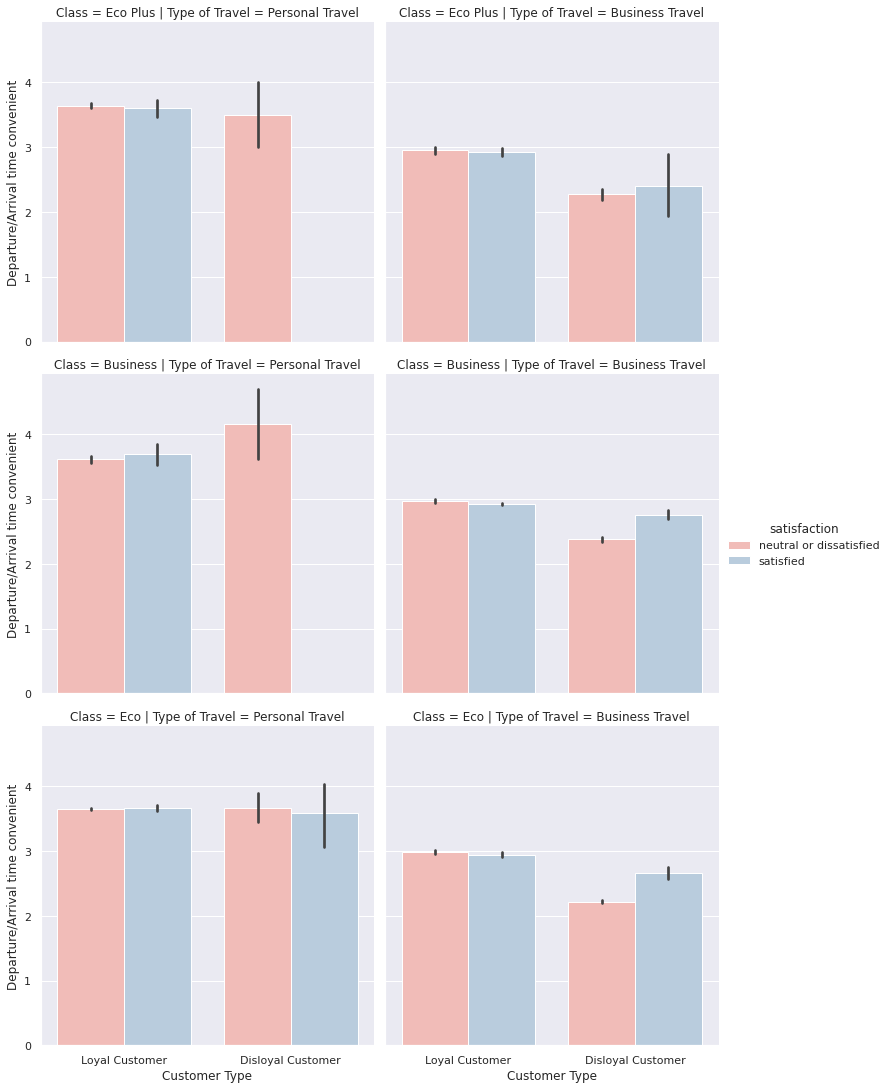

In [24]:
plt.figure(figsize=(7,7))
sns.catplot(y='Departure/Arrival time convenient',col='Type of Travel',x ='Customer Type',
            hue='satisfaction',row='Class', data=data, kind= 'bar',palette='Pastel1')
plt.show()

In [25]:
def percentage(x):
  return round(100*x.count()/data.shape[0],2)
table1=data.pivot_table(index=["Gender"],columns=["satisfaction"],aggfunc={"satisfaction":["count",percentage]},fill_value=0)
table1

satisfaction  ...           
                               count  ... percentage
satisfaction neutral or dissatisfied  ...  satisfied
Gender                                ...           
Female                         37630  ...      21.77
Male                           35822  ...      21.68

[2 rows x 4 columns]

In [26]:
gender="female"
for i,j,k,l in table1.values:
  print("Satisfaction rate for {} is: {:.3f}".format(gender,j/(i+j)))
  gender="male"

Satisfaction rate for female is: 0.429
Satisfaction rate for male is: 0.440


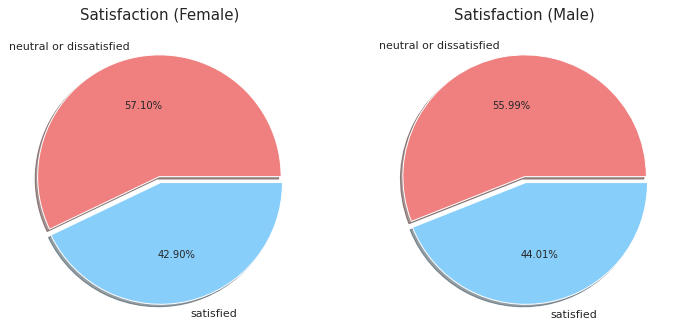

In [27]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(data.loc[data.Gender=="Female",'satisfaction'].value_counts(), labels=["neutral or dissatisfied","satisfied"], explode=[0, 0.05], autopct='%1.2f%%', shadow=True,colors=["lightcoral","lightskyblue"])
plt.title('Satisfaction (Female)', fontsize=15)

plt.subplot(1, 2, 2)
plt.pie(data.loc[data.Gender=="Male",'satisfaction'].value_counts(), labels=["neutral or dissatisfied","satisfied"], explode=[0, 0.05], autopct='%1.2f%%', shadow=True,colors=["lightcoral","lightskyblue"])
plt.title('Satisfaction (Male)', fontsize=15)

plt.show()

When we look at the satisfaction rates of women and men, we see that both are around 43-44%. There is no dominance in satisfaction by gender. The dissatisfaction rate is higher in both gender.

In [28]:
data.pivot_table(index=["Customer Type","Class"],columns=["satisfaction"],aggfunc={"satisfaction":["count",percentage]})

satisfaction  ...           
                                             count  ... percentage
satisfaction               neutral or dissatisfied  ...  satisfied
Customer Type     Class                             ...           
Disloyal Customer Business                    5569  ...       2.82
                  Eco                        11669  ...       1.51
                  Eco Plus                     842  ...       0.06
Loyal Customer    Business                   13425  ...      30.42
                  Eco                        35697  ...       6.91
                  Eco Plus                    6250  ...       1.73

[6 rows x 4 columns]

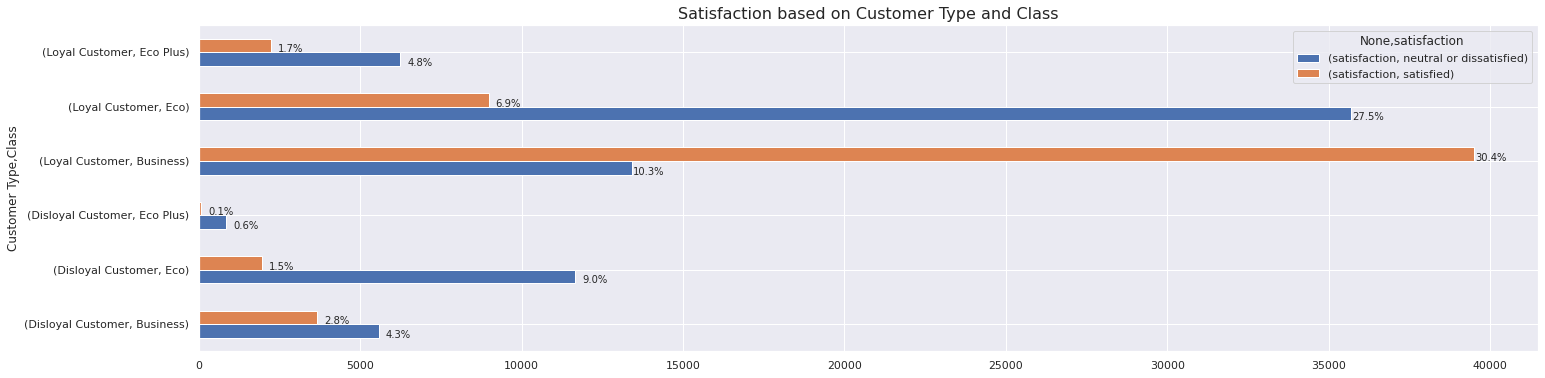

In [33]:
ax = data.pivot_table(index=["Customer Type","Class"],columns=["satisfaction"],aggfunc={"satisfaction":"count"}).plot(kind="barh",figsize=(24,6))
plt.title('Satisfaction based on Customer Type and Class', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x,y  = p.get_x() + p.get_width()+1000, p.get_y()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

We can see that those who are loyal customers and in the business class are the passengers with the highest satisfaction rate (30.4%). Passengers who are loyal and in the eco class are the passengers with the highest dissatisfaction rate (27.5%).

In [29]:
data.pivot_table(index=["Type of Travel","Class"],columns=["satisfaction"],aggfunc={"satisfaction":["count",percentage]})

satisfaction  ...           
                                           count  ... percentage
satisfaction             neutral or dissatisfied  ...  satisfied
Type of Travel  Class                             ...           
Business Travel Business                   16634  ...      32.99
                Eco                        17726  ...       5.83
                Eco Plus                    2977  ...       1.48
Personal Travel Business                    2360  ...       0.24
                Eco                        29640  ...       2.59
                Eco Plus                    4115  ...       0.30

[6 rows x 4 columns]

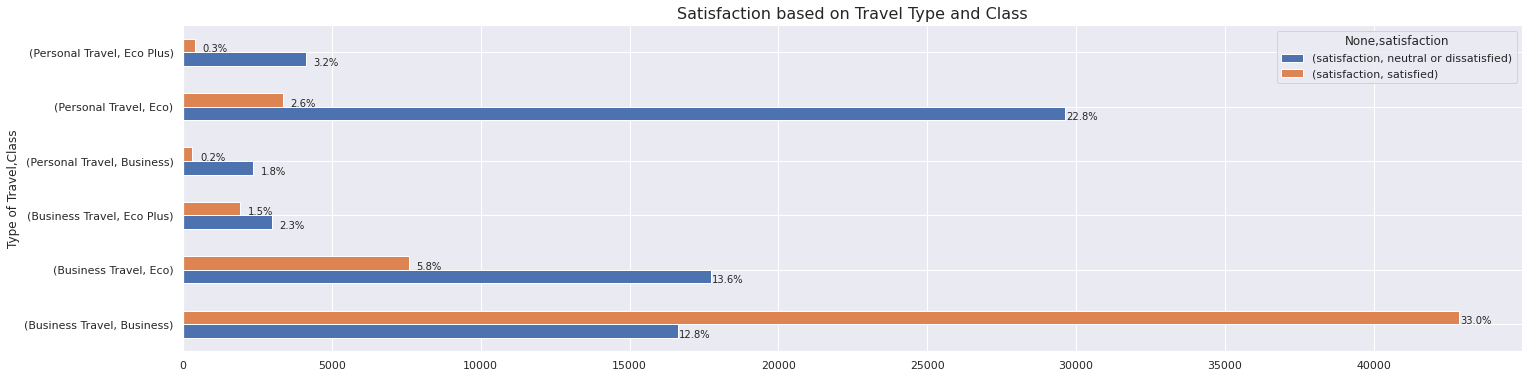

In [34]:
ax = data.pivot_table(index=["Type of Travel","Class"],columns=["satisfaction"],aggfunc={"satisfaction":"count"}).plot(kind="barh",figsize=(24,6))
plt.title('Satisfaction based on Travel Type and Class', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x,y  = p.get_x() + p.get_width()+1100, p.get_y()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

Business class passengers making business travel have the highest satisfaction rate (33.0%). Eco class passengers who make personal travel have the highest dissatisfaction rate (22.8%). We can say that travel type and class are both major factors in satisfaction.

In [30]:
data.pivot_table(index=["Gender","Customer Type"],columns=["Inflight wifi service"],aggfunc={"satisfaction":["count",percentage]})

satisfaction               ...                       
                                count               ... percentage            
Inflight wifi service               0     1      2  ...          3     4     5
Gender Customer Type                                ...                       
Female Disloyal Customer          470  2040   3344  ...       2.54  1.94  0.90
       Loyal Customer            1530  9313  13202  ...      10.03  7.67  4.64
Male   Disloyal Customer          409  1653   2750  ...       2.14  1.73  0.84
       Loyal Customer            1507  9322  13024  ...      10.07  7.73  4.68

[4 rows x 12 columns]

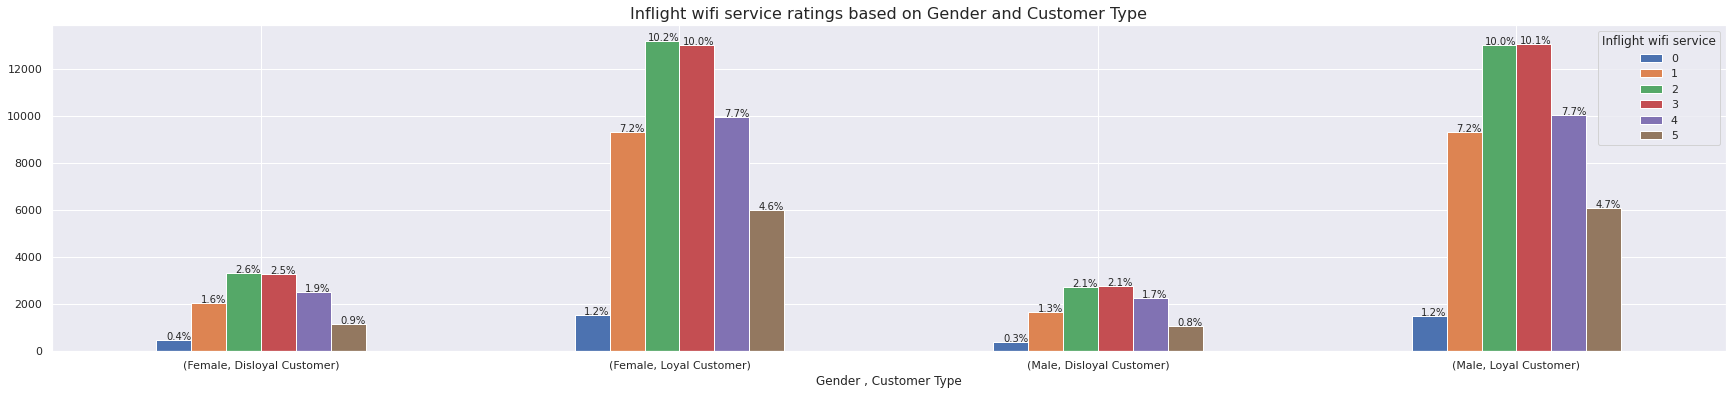

In [35]:
ax = pd.crosstab([data["Gender"], data["Customer Type"]],data["Inflight wifi service"],
            rownames=['Gender ', " Customer Type"],
            colnames=["Inflight wifi service"],
            dropna=False).plot(kind="bar",figsize=(30,6),rot=0)
plt.title('Inflight wifi service ratings based on Gender and Customer Type', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x, y = p.get_x() + p.get_width(), p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

When we compare the scores given to the service based on gender and customer type, we see a similar distribution. Since the number of loyal customers is high in data, their ratio seems to be higher. Gender is not a discriminative factor in scores. 

In [31]:
data.pivot_table(index="Class",columns=["Food and drink"],aggfunc={"satisfaction":["count",percentage]})

satisfaction                      ...                                
                      count                      ... percentage                     
Food and drink            0     1      2      3  ...          2      3      4      5
Class                                            ...                                
Business                 37  5369  13226  13443  ...      10.18  10.35  12.00  11.16
Eco                      73  9257  12197  12367  ...       9.39   9.52   9.90   8.90
Eco Plus                 22  1425   1960   1984  ...       1.51   1.53   1.64   1.46

[3 rows x 12 columns]

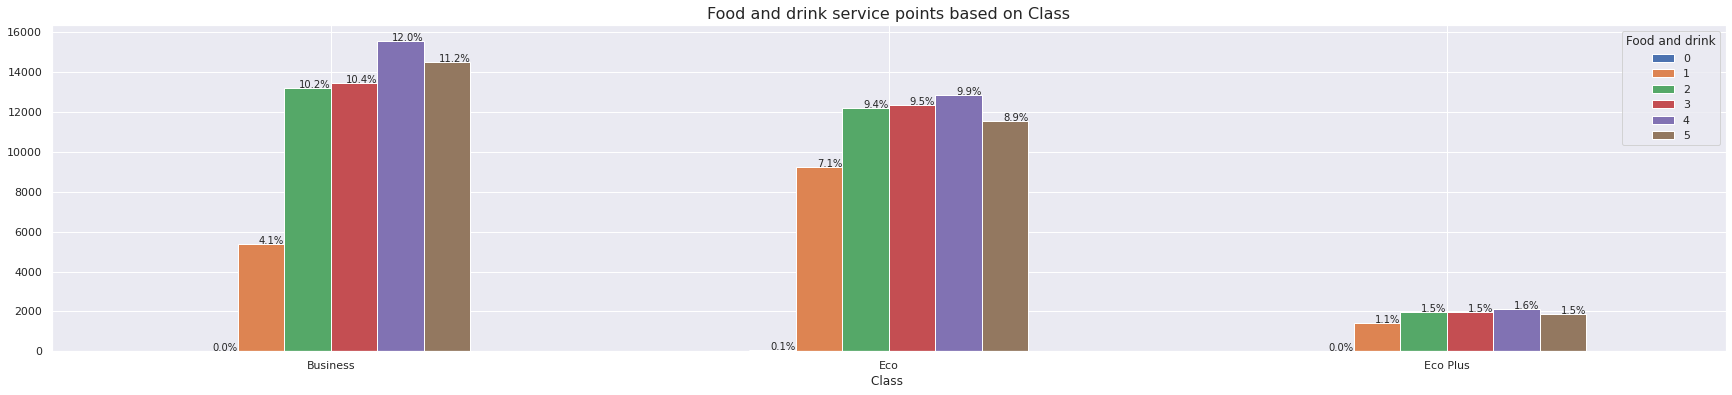

In [36]:
ax = pd.crosstab(data["Class"],data["Food and drink"],
            rownames=['Class '],
            colnames=['Food and drink'],
            dropna=False).plot(kind="bar",figsize=(30,6),rot=0)
plt.title('Food and drink service points based on Class', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

The number of passengers in the eco plus class is low in the data. The number of business class passengers and eco class passengers is very close to each other. Business class passengers seem to give more points to the food and drink service.

In [32]:
data.pivot_table(index=["Type of Travel","Cleanliness"],columns=['satisfaction'],aggfunc={"satisfaction":["count",percentage]},fill_value=0)

satisfaction  ...           
                                              count  ... percentage
satisfaction                neutral or dissatisfied  ...  satisfied
Type of Travel  Cleanliness                          ...           
Business Travel 0                                14  ...       0.00
                1                              7591  ...       2.01
                2                              9160  ...       2.72
                3                              9243  ...       9.53
                4                              7592  ...      13.28
                5                              3737  ...      12.77
Personal Travel 1                              5843  ...       0.53
                2                              6676  ...       0.57
                3                              8127  ...       0.68
                4                              8194  ...       0.72
                5                              7275  ...       0.63

[11 rows x 4 columns]

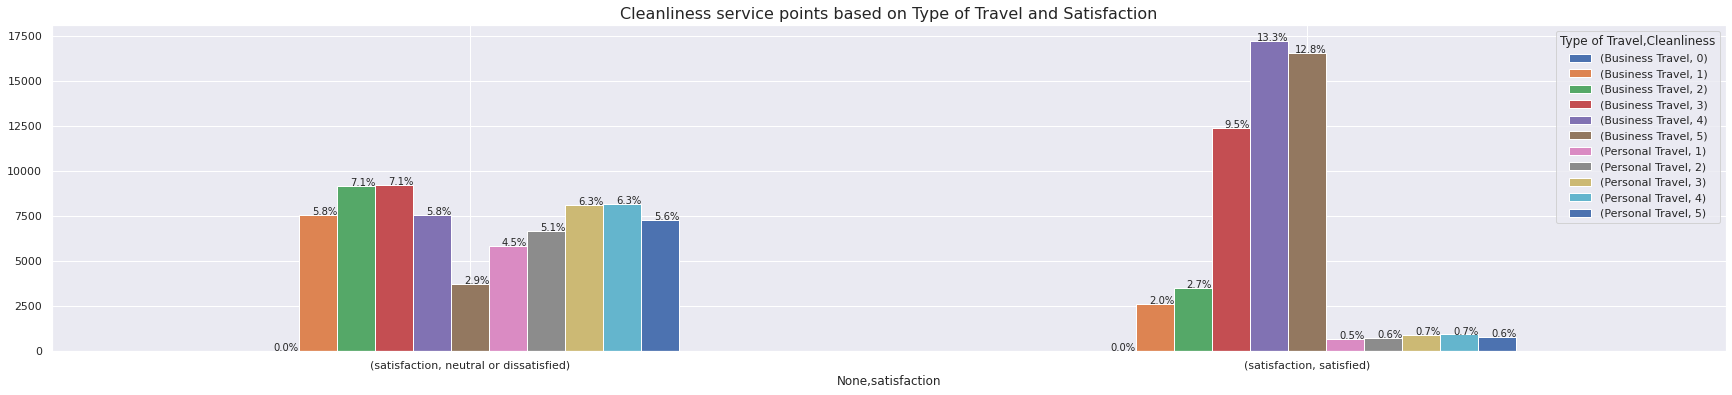

In [37]:
ax = data.pivot_table(index=["Type of Travel","Cleanliness"],columns=["satisfaction"],aggfunc={"satisfaction":"count"},fill_value=0).T.plot(kind="bar",figsize=(30,6),rot=0)
plt.title('Cleanliness service points based on Type of Travel and Satisfaction', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x, y = p.get_x() + p.get_width(), p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

While business travel passengers were more satisfied, personal travel passengers were more dissatisfied. Neutral or dissatisfied passengers give similar rates to cleanliness regardless of the type of travel. But among satisfied passengers, business travel passengers give more points to cleanliness. The number of passengers who are satisfied and make personal travel is quite low.

Dividing age column to four groups by looking at the quartiles to check if any pattern will be seen in different groups

In [38]:
data["Age Group"]=pd.cut(data.Age,[np.min(data.Age),np.percentile(data.Age,25),np.percentile(data.Age,50),np.percentile(data.Age,75),np.max(data.Age)+1], right=False)

In [39]:
data[["Age","Age Group"]][:5]

,Age,Age Group
0,13,"[7.0, 27.0)"
1,25,"[7.0, 27.0)"
2,26,"[7.0, 27.0)"
3,25,"[7.0, 27.0)"
4,61,"[51.0, 86.0)"


In [40]:
table2=data.pivot_table(index=["Age Group"],columns=["satisfaction"],aggfunc={"satisfaction":"count"},fill_value=0)
table2

satisfaction          
satisfaction neutral or dissatisfied satisfied
Age Group                                     
[7.0, 27.0)                    22085      8910
[27.0, 40.0)                   19779     13289
[40.0, 51.0)                   13579     18636
[51.0, 86.0)                   18009     15593

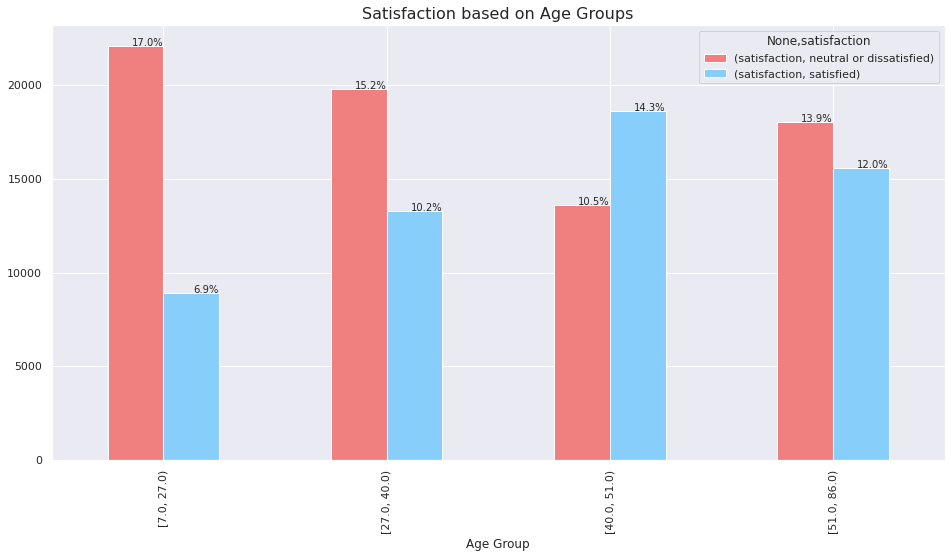

In [41]:
ax = table2.plot(kind="bar", figsize=(16,8), color=["#f08080","#87cefa"])
plt.title('Satisfaction based on Age Groups', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x, y = p.get_x() + p.get_width(), p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

While the majority of passengers between the ages of [40,51) are satisfied, the rate of dissatisfaction is higher for passengers in other age ranges.

In [42]:
table3=data.pivot_table(index=["Age Group"],columns=["Baggage handling",],aggfunc={"Baggage handling":"count"})
table3

Baggage handling                         
Baggage handling                1     2     3      4     5
Age Group                                                 
[7.0, 27.0)                  1652  2624  7082  11916  7721
[27.0, 40.0)                 2150  3441  7196  12089  8192
[40.0, 51.0)                 2294  3826  5497  11465  9133
[51.0, 86.0)                 2932  4471  6076  11291  8832

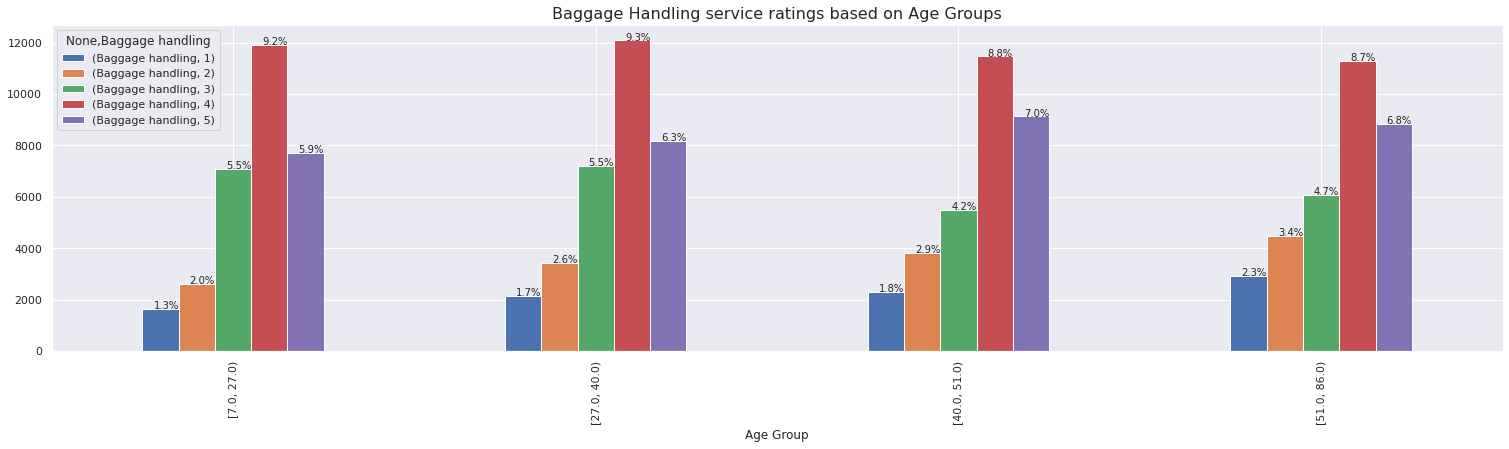

In [43]:
ax = table3.plot(kind="bar",figsize=(26,6))
plt.title('Baggage Handling service ratings based on Age Groups', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x, y = p.get_x() + p.get_width(), p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

When we look at the scores given to the baggage handling service by dividing the age groups, we can say that the scores are similar among age groups. I can say that age groups do not have an obvious effect on the scores.

In [44]:
data[(data['Departure Delay in Minutes'] == 0 ) & (data['Arrival Delay in Minutes'] == 0 )].groupby('satisfaction')["id"].count().reset_index().set_index("satisfaction")

,id
satisfaction,
neutral or dissatisfied,31345
satisfied,28006


When we look at the flights that do not delay on arrival and departure, the number of satisfied passenger still seems less.

**Visualizing numeric features**

Creating a pairplot to see the distribution of numeric features and their relation with other numeric features.

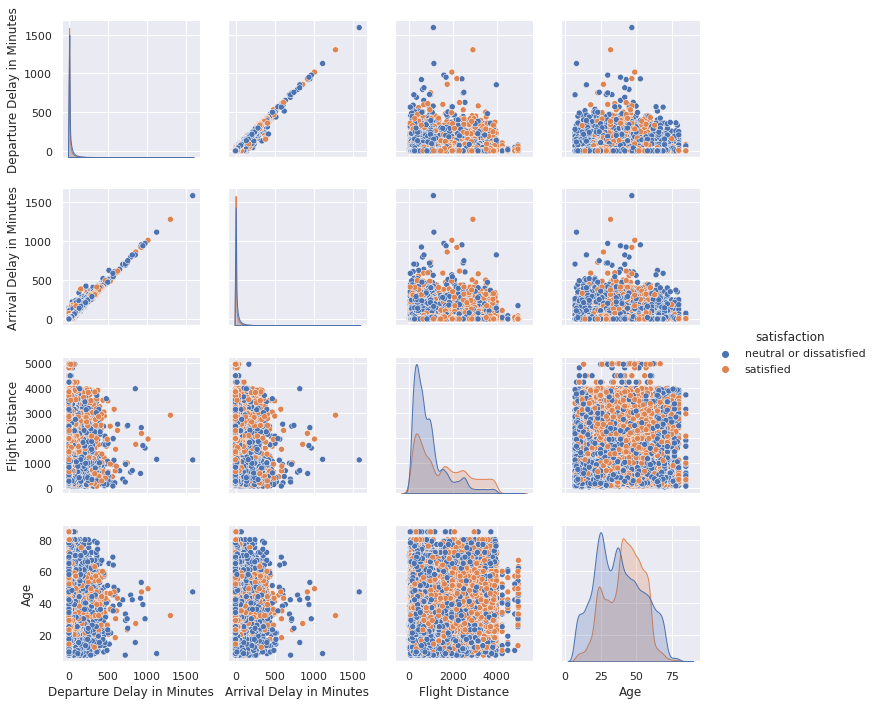

In [45]:
numerics=['Departure Delay in Minutes', 'Arrival Delay in Minutes','Flight Distance',"Age"]
sns.pairplot(data[[*numerics,"satisfaction"]],hue="satisfaction")
plt.show()

While there is a visible relationship between some numeric features (Arrival_Delay_in_Minutes and Departure_Delay_in_Minute), some are unrelated to each other (Flight_Distance and Age).

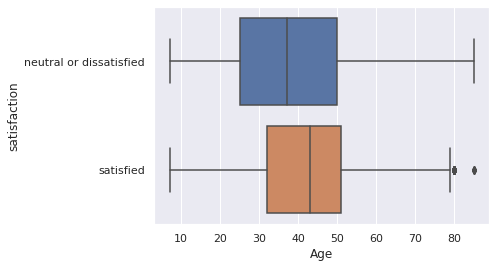

In [46]:
sns.boxplot(x="Age",y="satisfaction",data=data)
plt.show()

Checking outliers with boxplot

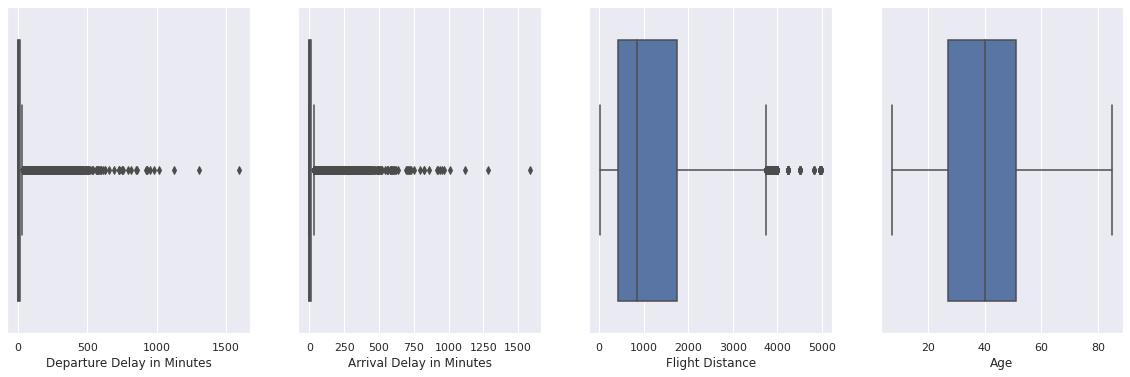

In [47]:
plt.figure(figsize=(20, 6))
for i,j in enumerate(numerics):
  plt.subplot(1,len(numerics),i+1)
  sns.boxplot(data[j])

There are outliers in data. I will handle them later.

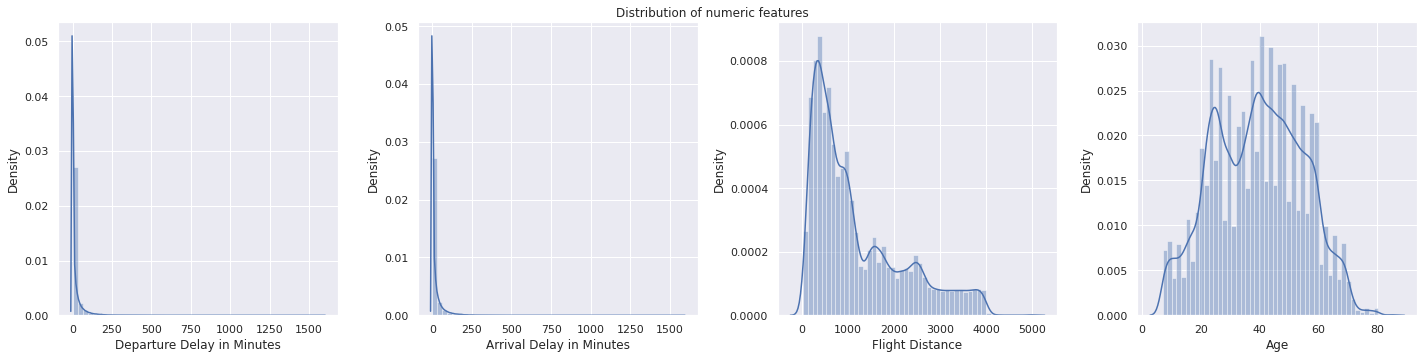

In [48]:
fig, ax = plt.subplots(1,len(numerics),figsize=(20,5))
fig.suptitle("Distribution of numeric features",y=1)
for i,j in enumerate(numerics):
  sns.distplot(x=data[j],ax=ax[i])
  ax[i].set_xlabel(j)
fig.tight_layout(pad=1.5)

Arrival_Delay_in_Minutes and Departure_Delay_in_Minutes columns show a maximum value at 0. As the delay minutes increase, occurrences decrease. We see that the values in the Flight_Distance column are mostly concentrated in the 0-1000 range. Also there are people of all ages in the data.

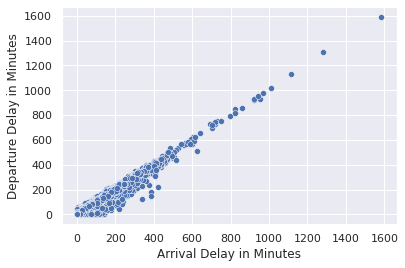

In [49]:
sns.scatterplot(x=data['Arrival Delay in Minutes'],y=data['Departure Delay in Minutes'])
plt.show()

In [50]:
data[['Arrival Delay in Minutes','Departure Delay in Minutes']].corr()

,Arrival Delay in Minutes,Departure Delay in Minutes
Arrival Delay in Minutes,1.000000,0.965291
Departure Delay in Minutes,0.965291,1.000000


Arrival_Delay_in_Minutes and Departure_Delay_in_Minutes columns are highly positive correlated. Correlated features will be checked again with heatmap. 

**Dropping unnecessary columns**

In [51]:
data.drop(["Unnamed: 0","id","Age Group"],axis=1,inplace=True)
data_backup=data.copy()
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,Disloyal Customer,25,Business Travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business Travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business Travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business Travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


**Checking correlation between features by creating a heatmap**

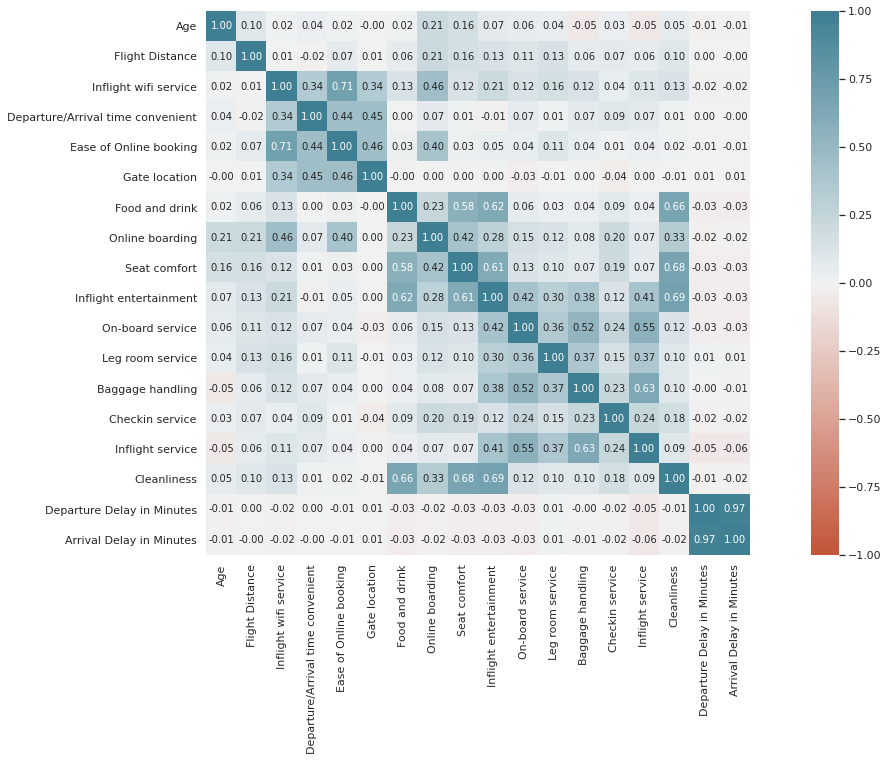

In [52]:
plt.figure(figsize=(22,10))
sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True,annot=True,fmt='.2f',)
plt.show()

* "Ease of Online booking" and "Inflight wifi service" are positive correlated with ratio 0.71.
* "Inflight entertainment" and "Food and drink" are positive correlated with ratio 0.62.
* "Inflight entertainment" and "Seat comfort" are positive correlated with ratio 0.61.
* "Inflight service" and "Baggage handling" are positive correlated with ratio 0.63.
* "Cleanliness" and "Food and drink" are positive correlated with ratio 0.66.
* "Cleanliness" and "Seat comfort" are positive correlated with ratio 0.68.
* "Cleanliness" and "Inflight entertainment" are positive correlated with ratio 0.69.

'Departure delay in minutes' and 'Arrival delay in minutes' columns are highly positive correlated (0.97) as we have seen. Normally we should drop one of them. Since 'Arrival_Delay_in_Minutes' column has null values, it would be our first choice. But 'Departure delay in minutes' and 'Arrival_Delay_in_Minutes' columns have full of zero values, so they are not very important features in model. I will drop both of these columns.

In [53]:
data.drop(["Arrival Delay in Minutes","Departure Delay in Minutes"],axis=1,inplace=True)

**Checking correlation to target**

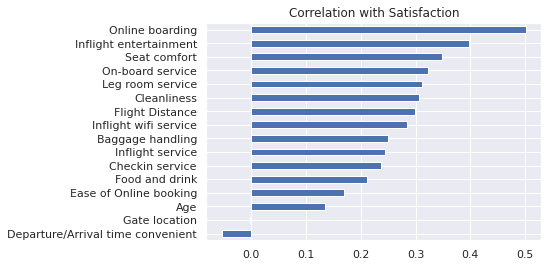

In [54]:
data_temp=data.copy()
data_temp["satisfaction"]=data_temp["satisfaction"].map({"satisfied":1,"neutral or dissatisfied":0})
data_temp.corr()['satisfaction'].sort_values().drop('satisfaction').plot(kind='barh',title="Correlation with Satisfaction")
plt.show()

Features that slightly correlates more with customer satisfaction are 'Inflight wifi service', 'Flight Distance', 'Cleanliness', 'Leg room service', 'On-board service', 'Seat comfort', 'Inflight entertainment',and 'Online boarding'.

Among features "Online boarding" has the maximum correlation to target, i will check its correlation with other features.

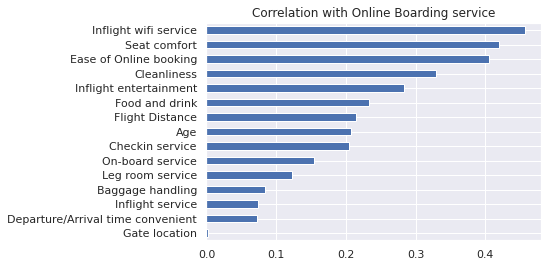

In [55]:
data_temp.corr()['Online boarding'].sort_values().drop(['Online boarding','satisfaction']).plot(kind='barh',title="Correlation with Online Boarding service")
plt.show()

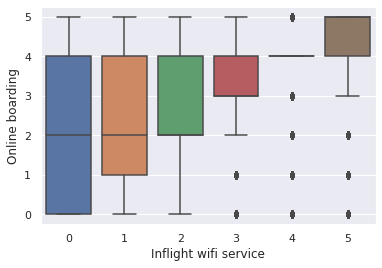

In [56]:
sns.boxplot(x=data['Inflight wifi service'], y = data_temp['Online boarding'])
plt.show()

As the score given to the Inflight wifi service increases, the range distributed to online boarding decreases and its score increases. People who gets better service of inflight wifi are more likely to give better rating for online boarding.

<h2> PRE-PROCESSING </h2>

**Encoding categoric features** 

In [57]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,Male,Disloyal Customer,25,Business Travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business Travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,satisfied
3,Female,Loyal Customer,25,Business Travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,Male,Loyal Customer,61,Business Travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,satisfied


In [58]:
#categorics
data[["Gender","Customer Type","Type of Travel","Class","satisfaction"]].head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,Disloyal Customer,Business Travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business Travel,Business,satisfied
3,Female,Loyal Customer,Business Travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business Travel,Business,satisfied


We have to transform our categoric features to numerics so our model can understand better and learn from the features.

In [59]:
#mapping ordinal features
data["Class"] = data["Class"].map({'Business':2, 'Eco Plus':1, 'Eco':0})
data["satisfaction"]=data["satisfaction"].map({"satisfied":1,"neutral or dissatisfied":0})

In [60]:
#for nominal features,
data_new=pd.get_dummies(data,drop_first=True)
#i use drop_first parameter so my model does not get any confusion by counting some features second time
data_new.reset_index(inplace=True)
data_new.drop("index",axis=1,inplace=True)
data_new.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Personal Travel
0,13,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0,1,1,1
1,25,2,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0,1,0,0
2,26,2,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,1,0,1,0
3,25,2,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0,0,1,0
4,61,2,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1,1,1,0


In [61]:
data_new[["Gender_Male","Customer Type_Loyal Customer","Type of Travel_Personal Travel","Class","satisfaction"]].head()

,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Personal Travel,Class,satisfaction
0,1,1,1,1,0
1,1,0,0,2,0
2,0,1,0,2,1
3,0,1,0,2,0
4,1,1,0,2,1


**Outlier Detection**

I will use Local Outlier Factor Method to detect and drop outliers.

In [62]:
df_local=data_new.copy()
temp = df_local.drop("satisfaction", axis=1)
local_outlier = LocalOutlierFactor(n_neighbors=2).fit_predict(temp)
outlier_local=list(np.where(local_outlier == -1)[0])
del temp
print(f"Outlier Count: {len(outlier_local)} \nSample Count: {len(df_local)} \nFraction: {round(len(outlier_local)/len(df_local),3)}")
df_local=df_local.drop(outlier_local).reset_index(drop=True)

Outlier Count: 1537 
Sample Count: 129880 
Fraction: 0.012


**Feature Transformation**

The assumptions of some machine learning models are based on the normality of features. I will try to make the distribution of my features look like a normal distribution with some transformation operations. Different methods can be used to see which one is better for the data. I will mostly check "Flight_Distance' and "Age" columns.

Methods i use:
1. Log Transformation
2. Square Root Transformation
3. Box Cox Transformation

In [63]:
#Log Transformation
df_log=df_local.copy()
df_log["Flight Distance"]=np.log(df_log["Flight Distance"])
df_log["Age"]=np.log(df_log["Age"])

In [64]:
#Square-Root Transformation
df_sqrt=df_local.copy()
df_sqrt["Flight Distance"]=np.sqrt(df_sqrt["Flight Distance"])
df_sqrt["Age"]=np.sqrt(df_sqrt["Age"])

In [65]:
#Box Cox Transformation
df_boxcox=df_local.copy()
df_boxcox["Flight Distance"],lmbda=boxcox(df_boxcox["Flight Distance"],lmbda=None)
df_boxcox["Age"],lmbda=boxcox(df_boxcox["Age"],lmbda=None)

Visualizing Transformed Features

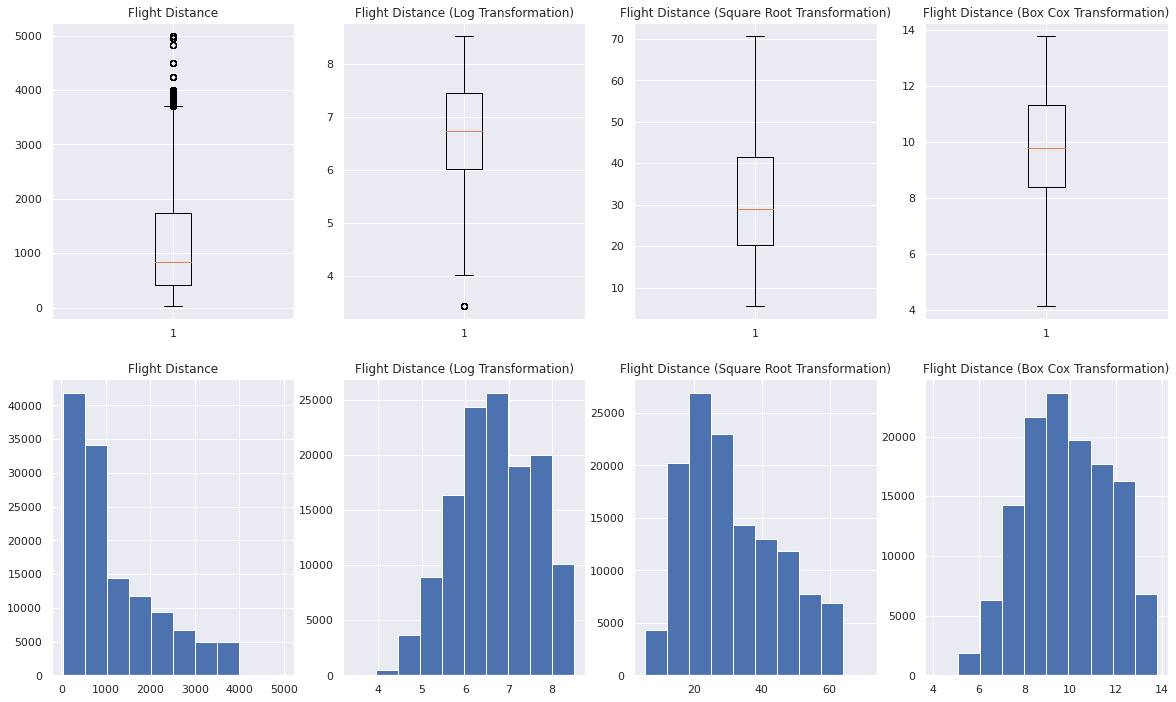

In [66]:
#Flight Distance feature
plt.figure(figsize=(20, 12))

plt.subplot(2, 4, 1)
plt.boxplot(df_local['Flight Distance'])
plt.title('Flight Distance')

plt.subplot(2, 4, 2)
plt.boxplot(df_log["Flight Distance"])
plt.title('Flight Distance (Log Transformation)')

plt.subplot(2, 4, 3)
plt.boxplot(df_sqrt['Flight Distance'])
plt.title('Flight Distance (Square Root Transformation)')

plt.subplot(2, 4, 4)
plt.boxplot(df_boxcox['Flight Distance']);
plt.title('Flight Distance (Box Cox Transformation)')

plt.subplot(2, 4, 5)
plt.hist(df_local['Flight Distance'])
plt.title('Flight Distance')

plt.subplot(2, 4, 6)
plt.hist(df_log["Flight Distance"])
plt.title('Flight Distance (Log Transformation)')

plt.subplot(2, 4, 7)
plt.hist(df_sqrt['Flight Distance'])
plt.title('Flight Distance (Square Root Transformation)')

plt.subplot(2, 4, 8)
plt.hist(df_boxcox['Flight Distance']);
plt.title('Flight Distance (Box Cox Transformation)')

plt.show()

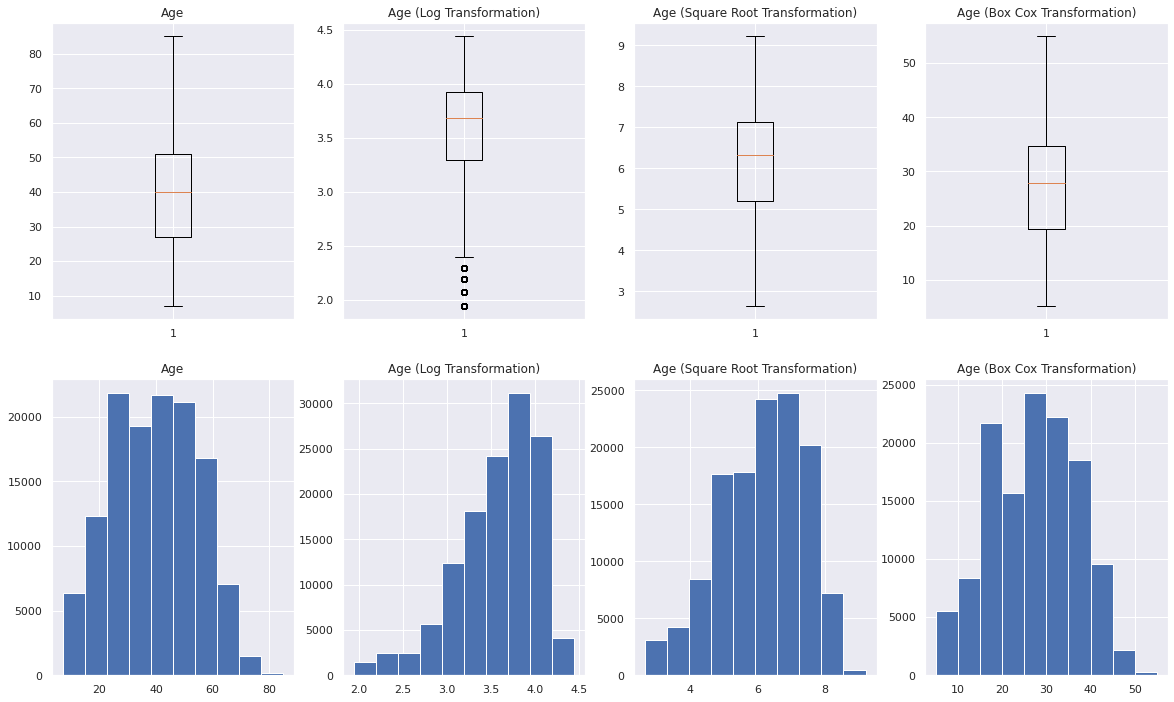

In [67]:
#Age Feature
plt.figure(figsize=(20, 12))

plt.subplot(2, 4, 1)
plt.boxplot(df_local['Age'])
plt.title('Age')

plt.subplot(2, 4, 2)
plt.boxplot(df_log["Age"])
plt.title('Age (Log Transformation)')

plt.subplot(2, 4, 3)
plt.boxplot(df_sqrt['Age'])
plt.title('Age (Square Root Transformation)')

plt.subplot(2, 4, 4)
plt.boxplot(df_boxcox['Age']);
plt.title('Age (Box Cox Transformation)')

plt.subplot(2, 4, 5)
plt.hist(df_local['Age'])
plt.title('Age')

plt.subplot(2, 4, 6)
plt.hist(df_log["Age"])
plt.title('Age (Log Transformation)')

plt.subplot(2, 4, 7)
plt.hist(df_sqrt['Age'])
plt.title('Age (Square Root Transformation)')

plt.subplot(2, 4, 8)
plt.hist(df_boxcox['Age']);
plt.title('Age (Box Cox Transformation)')

plt.show()

Checking Normality of transformed features

In [68]:
for j in ["Flight Distance","Age"]:
  transforms=[df_local[j], df_log[j], df_sqrt[j], df_boxcox[j]]
  processes=["original","log","square root","box cox"]
  for i,k in zip(transforms,processes):
    print(f"Normality for {j} Feature ({k}):",stats.shapiro(i))

Normality for Flight Distance Feature (original): (0.8628937602043152, 0.0)
Normality for Flight Distance Feature (log): (0.9800481796264648, 0.0)
Normality for Flight Distance Feature (square root): (0.949087917804718, 0.0)
Normality for Flight Distance Feature (box cox): (0.9811535477638245, 0.0)
Normality for Age Feature (original): (0.9883596897125244, 0.0)
Normality for Age Feature (log): (0.9298490285873413, 0.0)
Normality for Age Feature (square root): (0.9773417711257935, 0.0)
Normality for Age Feature (box cox): (0.9880269765853882, 0.0)


Even if I do transformation, my features still do not have a normal distribution. That's why I'm going to continue without transformation.

**Splitting data**

Splitting data into train and test with 0.7 train/0.3 test ratio so i can train my model with train data, and then test its performance with test data.

In [69]:
X_train, X_test, y_train, y_test=train_test_split(df_local.drop("satisfaction",axis=1),df_local["satisfaction"],test_size=0.3,random_state=42)

In [70]:
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (89840, 20)
Test size: (38503, 20)


**Feature Scaling**

We use Feature Scaling to standardize the independent features in a fixed range so each feature contributes approximately to model. Due to my distribution, I can not use Standard Scaler. I use MinMax Scaler which transforms data range to (0,1).

In [71]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

<h2> MODEL </h2>

Models i use:
* Gaussian Naive Bayes
* Linear SVC
* Logistic Regression
* K-Nearest Neighbors
* Decision Tree
* Voting Classifier
* Bagging Classifier
* Random Forest
* AdaBoost 
* Stochastic Gradient Boosting
* XGBoost

In [72]:
#Creating a function that creates a dataframe for testing model performance
def model_perf(model,X_train,X_test,y_train,y_test,pred,model_name):
  """Takes the data, returns a dataframe that calculates the performance of the model"""
  cv_results=cross_val_score(model,X_train,y_train,cv=5)
  perf_df=pd.DataFrame({"Mean_CV":np.mean(cv_results),"Std_CV":np.std(cv_results),'Train_Score':model.score(X_train,y_train),"Test_Score":model.score(X_test,y_test),"Precision_Score":precision_score(y_test,pred),"Recall_Score":recall_score(y_test,pred),"F1_Score":f1_score(y_test,pred)},index=[model_name])
  return perf_df

**Gaussian Naive Bayes**

In [73]:
nb=GaussianNB().fit(X_train_scaled,y_train)
pred_nb = nb.predict(X_test_scaled)
perf_nb=model_perf(nb,X_train_scaled,X_test_scaled,y_train,y_test,pred_nb,"Gaussian NB")
perf_nb

,Mean_CV,Std_CV,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score
Gaussian NB,0.867008,0.001184,0.866886,0.869023,0.867738,0.823871,0.845236


**Linear SVC**

In [74]:
svc=LinearSVC()
parameters={"C":[0.01,0.1,1,10]}
searcher=GridSearchCV(svc,parameters,cv=5,n_jobs=-1).fit(X_train_scaled,y_train)
best_model_svc=searcher.best_estimator_
pred_svc = best_model_svc.predict(X_test_scaled)
print("Best Parameters:",searcher.best_params_)
perf_svc=model_perf(best_model_svc,X_train_scaled,X_test_scaled,y_train,y_test,pred_svc,"Linear SVC")
perf_svc

Best Parameters: {'C': 1}


,Mean_CV,Std_CV,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score
Linear SVC,0.873442,0.001564,0.873319,0.87375,0.870299,0.833383,0.851441


**Logistic Regression**

In [75]:
log=LogisticRegression(random_state=42)
params={"C":[0.001,0.01,0.1,1,10],"penalty":["l1","l2"]}
searcher=GridSearchCV(log,params,cv=5,n_jobs=-1).fit(X_train_scaled,y_train)
best_model_log=searcher.best_estimator_
pred_log = best_model_log.predict(X_test_scaled)
print("Best Parameters:",searcher.best_params_)
y_pred_log_proba=best_model_log.predict_proba(X_test_scaled)[:,1]
print("ROC AUC Score:",roc_auc_score(y_test,y_pred_log_proba))
perf_log=model_perf(best_model_log,X_train_scaled,X_test_scaled,y_train,y_test,pred_log,"Logistic Regression")
perf_log

Best Parameters: {'C': 0.1, 'penalty': 'l2'}
ROC AUC Score: 0.9282668886994743


,Mean_CV,Std_CV,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score
Logistic Regression,0.874154,0.001697,0.874421,0.874607,0.86969,0.836494,0.852769


**KNN**

In [76]:
knn=KNeighborsClassifier()
params={"n_neighbors":np.arange(3,10,2)}
searcher=GridSearchCV(knn,params,cv=5,n_jobs=-1).fit(X_train_scaled,y_train)
best_model_knn=searcher.best_estimator_
pred_knn = best_model_knn.predict(X_test_scaled)
print("Best Parameters:",searcher.best_params_)
perf_knn=model_perf(best_model_knn,X_train_scaled,X_test_scaled,y_train,y_test,pred_knn,"KNN")
perf_knn

Best Parameters: {'n_neighbors': 5}


,Mean_CV,Std_CV,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score
KNN,0.927282,0.001117,0.948731,0.928499,0.952372,0.87927,0.914362


**Decision Tree**

In [77]:
dt=DecisionTreeClassifier(random_state=42)
parameters={"max_depth":[*range(3,10,2),None],"max_features":[*range(3,10,2),None],"min_samples_leaf":list(range(1,10,2)),"criterion":["gini","entropy"]}
searcher=GridSearchCV(dt,parameters,cv=5,n_jobs=-1).fit(X_train_scaled,y_train)
best_model_dt=searcher.best_estimator_
pred_dt = best_model_dt.predict(X_test_scaled)
print("Best Parameters:",searcher.best_params_)
perf_dt=model_perf(best_model_dt,X_train_scaled,X_test_scaled,y_train,y_test,pred_dt,"Decision Tree")
perf_dt

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 7}


,Mean_CV,Std_CV,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score
Decision Tree,0.950356,0.000977,0.973809,0.952861,0.952998,0.937661,0.945267


**Ensemble Learning - Voting Classifier**

In [78]:
classifiers=[("Logistic Regression",best_model_log),("KNN",best_model_knn),("Decision Tree",best_model_dt)]
vc=VotingClassifier(estimators=classifiers).fit(X_train_scaled,y_train)
pred_vc=vc.predict(X_test_scaled)
perf_vc=model_perf(vc,X_train_scaled,X_test_scaled,y_train,y_test,pred_vc,"Voting Classifier")
perf_vc

,Mean_CV,Std_CV,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score
Voting Classifier,0.936354,0.001053,0.954608,0.937979,0.958699,0.895722,0.926141


**Ensemble Learning - Bagging Classifier**

In [79]:
base_dt=DecisionTreeClassifier(random_state=42)
bc=BaggingClassifier(base_estimator=base_dt,n_estimators=300,oob_score=True,n_jobs=-1).fit(X_train_scaled,y_train)
pred_bc=bc.predict(X_test_scaled)
print("OOB Score:",bc.oob_score_)
perf_bc=model_perf(bc,X_train_scaled,X_test_scaled,y_train,y_test,pred_bc,"Bagging Classifier")
perf_bc

OOB Score: 0.9617097061442564


,Mean_CV,Std_CV,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score
Bagging Classifier,0.961153,0.000843,1.0,0.961613,0.973463,0.937122,0.954947


**Ensemble Learning - Random Forest**

In [80]:
rf=RandomForestClassifier(random_state=42,n_estimators=300).fit(X_train_scaled,y_train)
pred_rf=rf.predict(X_test_scaled)
perf_rf=model_perf(rf,X_train_scaled,X_test_scaled,y_train,y_test,pred_rf,"Random Forest")
perf_rf

,Mean_CV,Std_CV,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score
Random Forest,0.962923,0.001625,1.0,0.963172,0.975446,0.938797,0.956771


**Ensemble Learning - AdaBoost**

In [81]:
base_ada_dt=DecisionTreeClassifier(max_depth=1,random_state=42)
adb=AdaBoostClassifier(base_estimator=base_ada_dt,n_estimators=100).fit(X_train_scaled,y_train)
pred_adb=adb.predict(X_test_scaled)
y_pred_adb_proba=adb.predict_proba(X_test_scaled)[:,1]
print("ROC AUC Score:",roc_auc_score(y_test,y_pred_adb_proba))
perf_adb=model_perf(adb,X_train_scaled,X_test_scaled,y_train,y_test,pred_adb,"AdaBoost")
perf_adb

ROC AUC Score: 0.9781528138803199


,Mean_CV,Std_CV,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score
AdaBoost,0.928384,0.001915,0.929207,0.92772,0.92486,0.907209,0.915949


**Ensemble Learning - Stochastic Gradient Boosting Classifier**

In [82]:
sgb=GradientBoostingClassifier(n_estimators=300,max_depth=11,subsample=0.8,max_features=0.6,random_state=42).fit(X_train_scaled,y_train) #Tuned parameters (with GridCV)
pred_sgb=sgb.predict(X_test_scaled)
perf_sgb=model_perf(sgb,X_train_scaled,X_test_scaled,y_train,y_test,pred_sgb,"Stochastic Gradient Boosting")
perf_sgb

,Mean_CV,Std_CV,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score
Stochastic Gradient Boosting,0.963646,0.001358,1.0,0.963613,0.972829,0.942507,0.957428


**Ensemble Learning - XGBoost (Extreme Gradient Boosting)**

In [83]:
xgb=XGBClassifier(random_state=42, max_depth=9, min_child_weight=3, n_estimators=100) #Tuned parameters (with GridCV)
xgb.fit(X_train_scaled,y_train)
pred_xgb = xgb.predict(X_test_scaled)
perf_xgb=model_perf(xgb,X_train_scaled,X_test_scaled,y_train,y_test,pred_xgb,"XGBoost")
perf_xgb

,Mean_CV,Std_CV,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score
XGBoost,0.964337,0.001301,0.973008,0.964704,0.977191,0.940652,0.958573


<h2>MODEL RESULTS</h2>

In [84]:
pd.concat([perf_nb, perf_svc, perf_log, perf_knn, perf_dt, perf_vc, perf_bc, perf_rf, perf_adb, perf_sgb, perf_xgb])

,Mean_CV,Std_CV,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score
Gaussian NB,0.867008,0.001184,0.866886,0.869023,0.867738,0.823871,0.845236
Linear SVC,0.873442,0.001564,0.873319,0.873750,0.870299,0.833383,0.851441
Logistic Regression,0.874154,0.001697,0.874421,0.874607,0.869690,0.836494,0.852769
KNN,0.927282,0.001117,0.948731,0.928499,0.952372,0.879270,0.914362
Decision Tree,0.950356,0.000977,0.973809,0.952861,0.952998,0.937661,0.945267
Voting Classifier,0.936354,0.001053,0.954608,0.937979,0.958699,0.895722,0.926141
Bagging Classifier,0.961153,0.000843,1.000000,0.961613,0.973463,0.937122,0.954947
Random Forest,0.962923,0.001625,1.000000,0.963172,0.975446,0.938797,0.956771
AdaBoost,0.928384,0.001915,0.929207,0.927720,0.924860,0.907209,0.915949
Stochastic Gradient Boosting,0.963646,0.001358,1.000000,0.963613,0.972829,0.942507,0.957428


As I knew it was not right to only look at accuracy when evaluating my model performance in classification problems, I also looked at precision, recall, and f1 score. I also checked the cross validation mean and the cross validation standard deviation to account for any deviations between results. As a result, all models performed well and close to each other. By considering F1 score; Bagging Classifier, Random forest, Stochastic Gradient Boosting and XGBoost have the highest scores. Classification report and confusion matrix of Random Forest model are shown below.

In [85]:
perf_rf

,Mean_CV,Std_CV,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score
Random Forest,0.962923,0.001625,1.0,0.963172,0.975446,0.938797,0.956771


In [86]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     21788
           1       0.98      0.94      0.96     16715

    accuracy                           0.96     38503
   macro avg       0.96      0.96      0.96     38503
weighted avg       0.96      0.96      0.96     38503



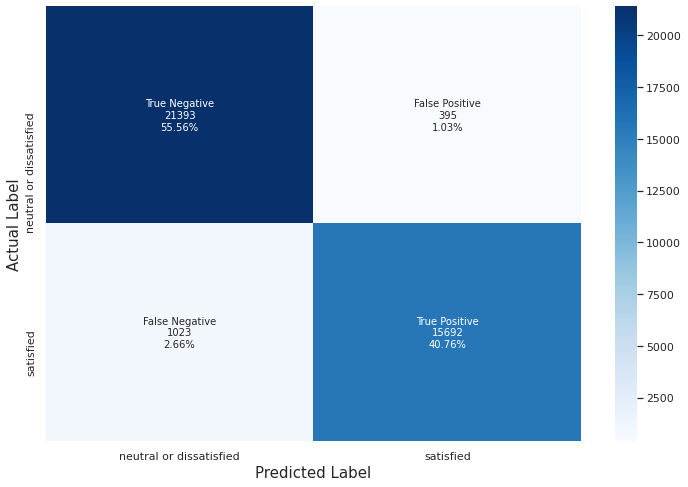

In [87]:
plt.figure(figsize=(12, 8))
cf_matrix=confusion_matrix(y_test,pred_rf)
group_names = ["True Negative","False Positive","False Negative","True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax=sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues',xticklabels=["neutral or dissatisfied","satisfied"], yticklabels=["neutral or dissatisfied","satisfied"])
ax.set_xlabel('Predicted Label',fontsize = 15)
ax.set_ylabel('Actual Label',fontsize = 15)
plt.show()

As we saw in the confusion matrix, the model predicted most of the data correctly. If we look at the wrong guesses,

* Model guessed 395 of those who were actually 'neutral or dissatifisfied' wrong and said 'satisfied'. Their rate is 1.03% of the total data. 
* Model guessed 1023 of those who were actually 'satisfied' wrong and said 'neutral or dissatisfied'. Their rate is 2.66% of the total data.

<h2>CONCLUSION</h2>

> It would be more meaningful if the data were divided into 3 groups as satisfied, neutral and dissatisfied passengers. It was difficult to draw meaningful conclusions as the inclusion of neutral passengers in the dissatisfied group increased the dissatisfaction rate for all services.

> By looking at the visualizations and feature importances of model; services that affect satisfaction the most are Online boarding, Inflight wifi service, Inflight entertainment, Seat comfort, Cleanliness, and On board service.

> Gender has no obvious effect on overall satisfaction and scores.

> Passengers whose age is between 40 to 51 are more likely to be satisfied.

> The majority of personal travel passengers are not satisfied, incentive campaigns can be organized for them.

> While the business class passengers are generally satisfied, the majority of the eco class passengers are not. Extra services can be added for eco class.